In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
train_set.columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

In [4]:
train_set.shape

(32561, 15)

In [5]:
df = train_set.copy()

In [109]:
df1 = train_set.copy()

In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours/Week      32561 non-null  int64 
 13  Native country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum()

Age               0
Workclass         0
fnlgwt            0
Education         0
Education num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Native country    0
Income            0
dtype: int64

In [27]:
for features in df.columns:
    if df[features].dtypes =='object':
        print(features,':',len(df[features].unique()),'labels')

Workclass : 9 labels
Education : 16 labels
Marital Status : 7 labels
Occupation : 15 labels
Relationship : 6 labels
Race : 5 labels
Sex : 2 labels
Native country : 42 labels
Income : 2 labels


In [28]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [54]:
def plot_categorical_feature(dataset,x):
    plt.figure(figsize=(10,8))
    sns.countplot(x = x, data = dataset)
    plt.xticks(rotation=90)

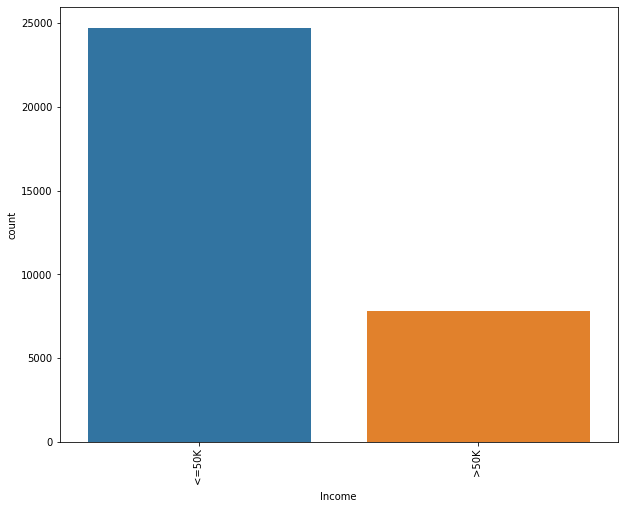

In [69]:
plot_categorical_feature(df,'Income')

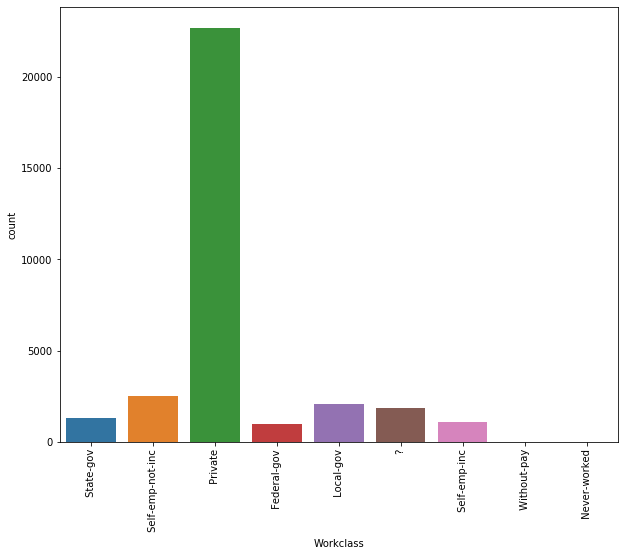

In [56]:
plot_categorical_feature(df,'Workclass')

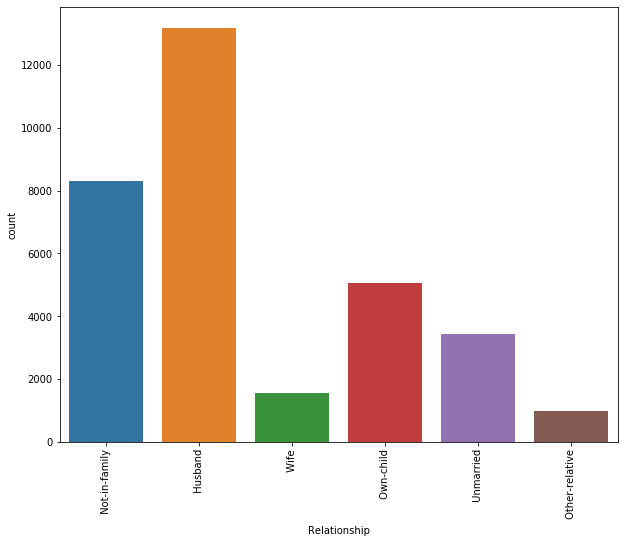

In [57]:
plot_categorical_feature(df,'Relationship')

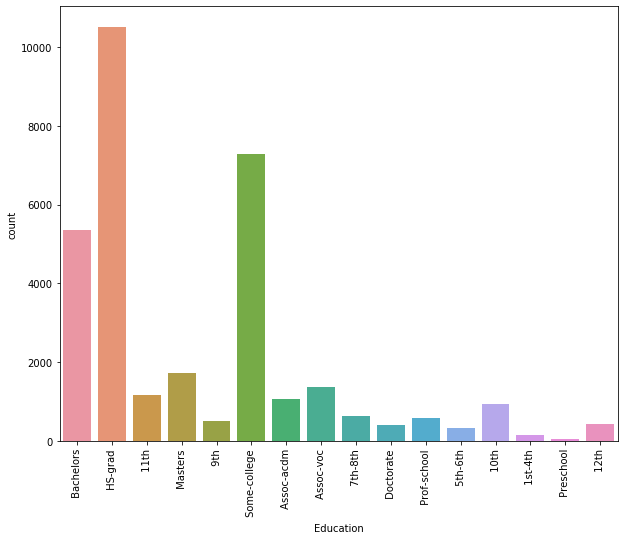

In [62]:
plot_categorical_feature(df,'Education')

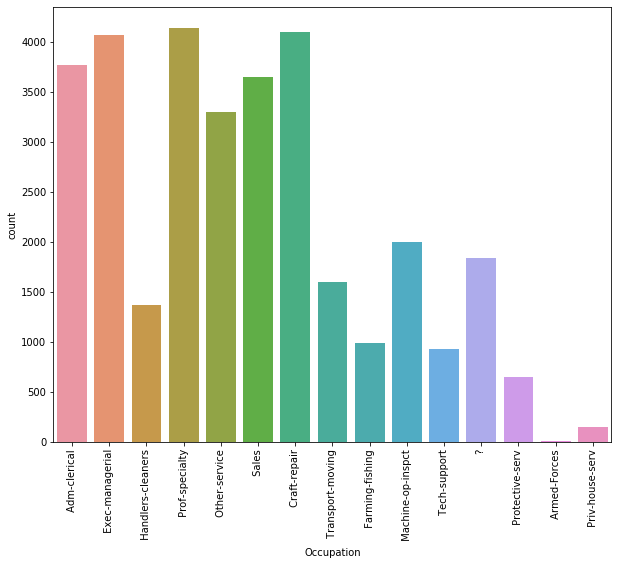

In [59]:
plot_categorical_feature(df,'Occupation')

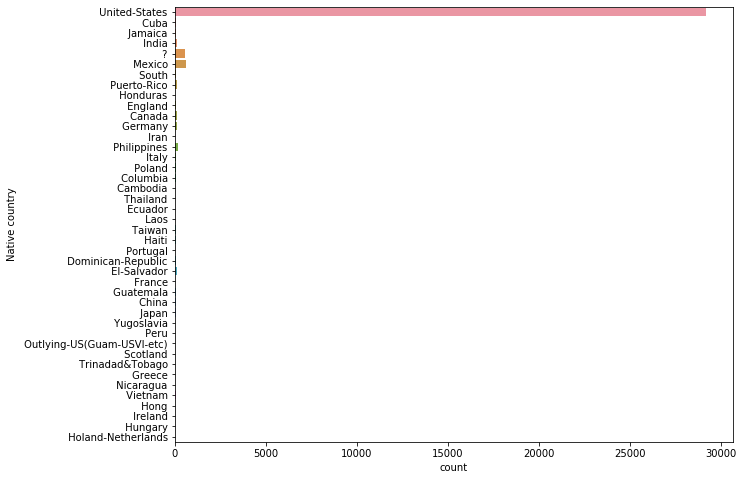

In [72]:
plt.figure(figsize=(10,8))
sns.countplot(y = 'Native country', data = df)

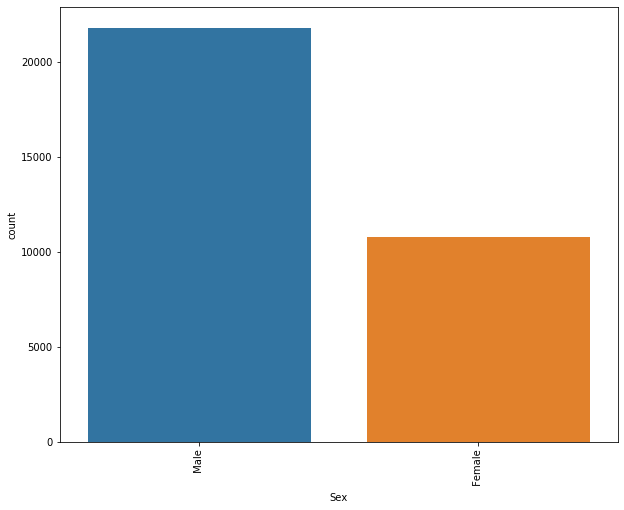

In [60]:
plot_categorical_feature(df,'Sex')

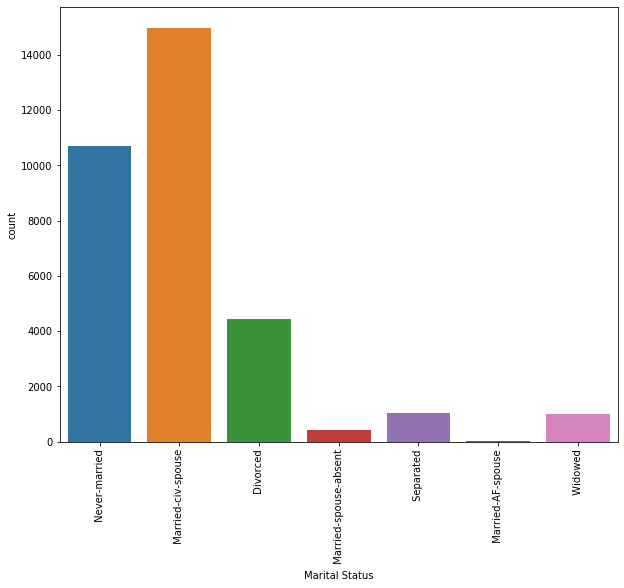

In [61]:
plot_categorical_feature(df,'Marital Status')

In [63]:
def plot_num_feature(dataset,x):
    plt.figure(figsize=(10,8))
    sns.distplot(dataset[x])
    plt.xticks(rotation=90)

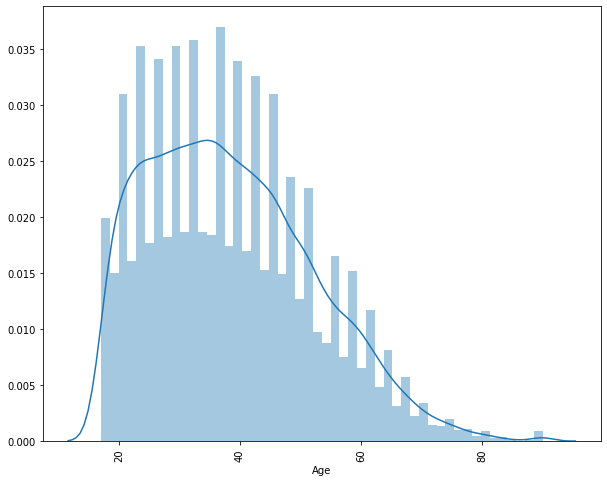

In [64]:
plot_num_feature(df,'Age')

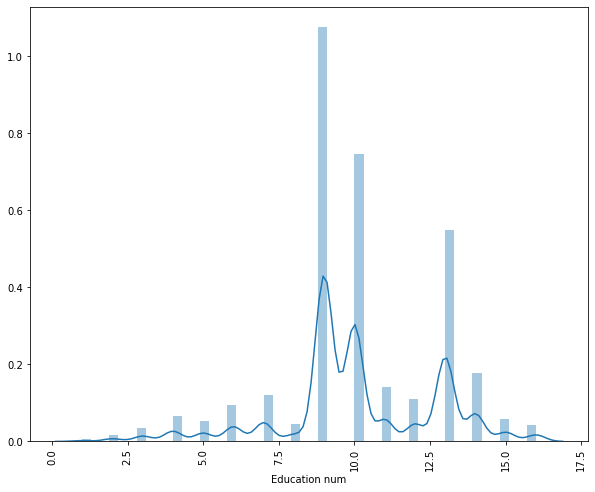

In [66]:
plot_num_feature(df,'Education num')

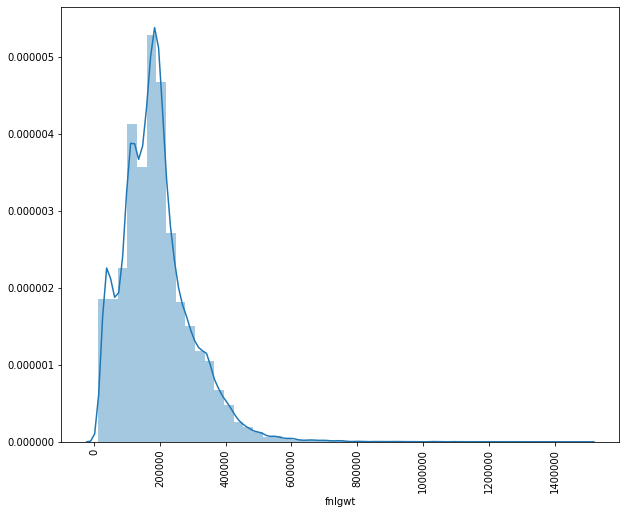

In [67]:
plot_num_feature(df,'fnlgwt')

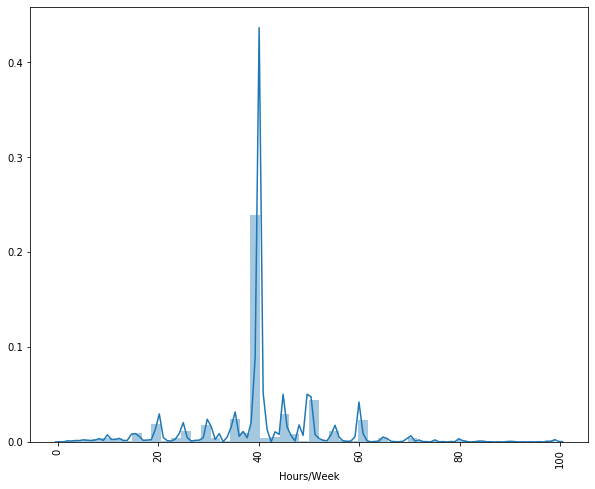

In [68]:
plot_num_feature(df,'Hours/Week')

In [73]:
df = df.apply(lambda x : x.replace (' ?',np.nan))

In [74]:
df.isnull().sum()

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     583
Income               0
dtype: int64

In [75]:
df.dropna(inplace=True)

In [76]:
df.isnull().sum()

Age               0
Workclass         0
fnlgwt            0
Education         0
Education num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Native country    0
Income            0
dtype: int64

In [80]:
for features in df.columns:
    if df[features].dtypes =='object':
        print(features,':',len(df[features].unique()),'labels')

Workclass : 7 labels
Education : 16 labels
Marital Status : 7 labels
Occupation : 14 labels
Relationship : 6 labels
Race : 5 labels
Sex : 2 labels
Native country : 41 labels
Income : 2 labels


In [78]:
# converting catogerical values into numerical values
dict_sex = {}
count = 0
for i in df['Sex'].unique():
    dict_sex[i] = count
    count +=1

In [96]:
dict_sex 

{' Male': 0, ' Female': 1}

In [81]:
dict_workclass = {}
count = 0
for i in df['Workclass'].unique():
    dict_workclass[i] = count
    count += 1
    

In [97]:
dict_workclass

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' Self-emp-inc': 5,
 ' Without-pay': 6}

In [82]:
dict_education = {}
count = 0
for i in df['Education'].unique():
    dict_education[i] = count
    count += 1

In [84]:
dict_Marital_Status = {}
count = 0
for i in df['Marital Status'].unique():
    dict_Marital_Status[i] = count
    count += 1

In [85]:
dict_Occupation = {}
count = 0
for i in df['Occupation'].unique():
    dict_Occupation[i] = count
    count += 1

In [91]:
dict_Relationship = {}
count = 0
for i in df['Relationship'].unique():
    dict_Relationship[i] = count
    count += 1

In [92]:
dict_race = {}
count = 0
for i in df['Race'].unique():
    dict_race[i] = count
    count += 1

In [99]:
country_map = df['Native country'].value_counts().to_dict()

In [101]:
df['Native country'] = df['Native country'].map(country_map)

In [95]:
dict_income = {}
count = 0
for i in df['Income'].unique():
    dict_income[i] = count
    count += 1

In [103]:
df['Sex'] = df['Sex'].map(dict_sex)
df['Workclass'] = df['Workclass'].map(dict_workclass)
df['Education'] = df['Education'].map(dict_education)
df['Marital Status'] = df['Marital Status'].map(dict_Marital_Status)
df['Occupation'] = df['Occupation'].map(dict_Occupation)
df['Relationship'] = df['Relationship'].map(dict_Relationship)
df['Race'] = df['Race'].map(dict_race)
df['Income'] = df['Income'].map(dict_income)

In [104]:
df.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,27504,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,27504,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,27504,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,27504,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,92,0


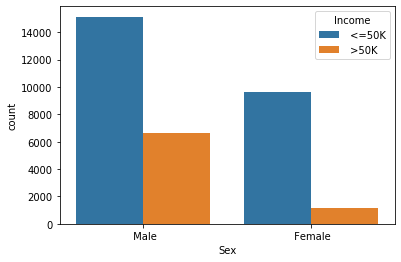

In [110]:
# Annual Income Data Analysis using visualization
sns.countplot(data=df1, x='Sex',hue='Income')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

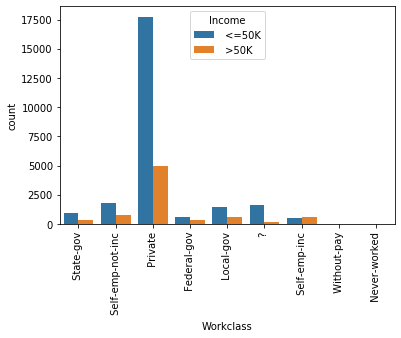

In [118]:
sns.countplot(data=df1, x='Workclass',hue='Income')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

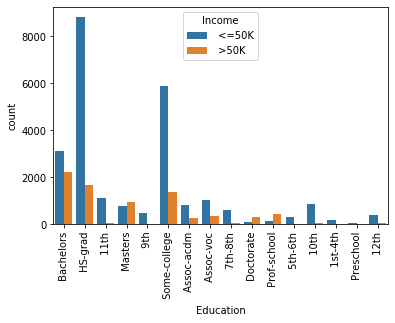

In [119]:
sns.countplot(data=df1, x='Education',hue='Income')
plt.xticks(rotation=90)

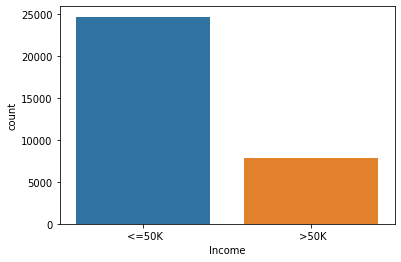

In [114]:
sns.countplot(data=df1, x='Income')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CB8A788>,
      dtype=object)

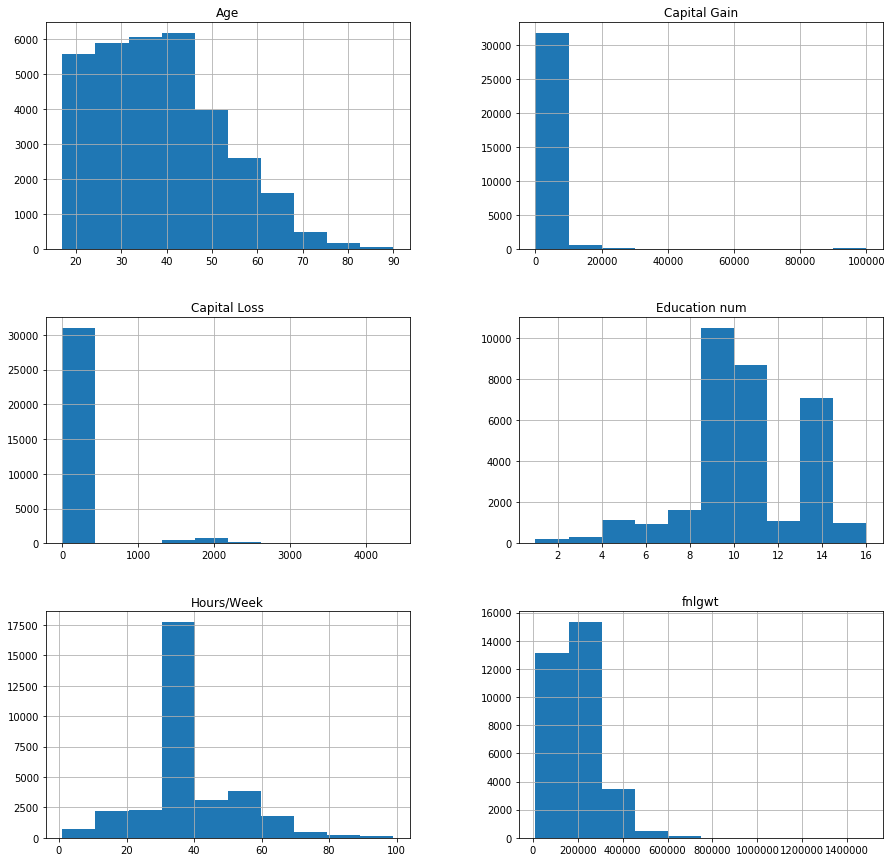

In [117]:
pd.DataFrame.hist(df1,figsize=(15,15))

In [121]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [136]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print(cm)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[4252  517]
 [ 280  984]]
0.8678932537709265
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      4769
           1       0.66      0.78      0.71      1264

    accuracy                           0.87      6033
   macro avg       0.80      0.84      0.81      6033
weighted avg       0.88      0.87      0.87      6033

